# Machine Learning Pipeline - Model Training - Random Forest

En este notebook, recogemos los conjuntos de datos transformados y las variables seleccionadas que guardamos en los notebooks anteriores

# Reproducibilidad: sembramos la semilla

Con el objetivo de garantizar la reproducibilidad entre ejecuciones del mismo notebook, pero también entre el entorno de investigación y producción, para cada paso que incluya algún elemento de aleatoriedad, es extremadamente importante que **establezcamos la semilla**

In [11]:
# Para manipulacion de datos
import pandas as pd
import numpy as np

# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Para guardar el modelo
import joblib

# Para construir los modelos
#Clasificación
from sklearn.ensemble import RandomForestClassifier

# Para evaluar los modelos
from sklearn.metrics import roc_auc_score, classification_report

# Para visualizar todas las columnas del dataframe
pd.pandas.set_option('display.max_columns', None)

In [12]:
# cargar el conjunto de entrenamiento y el de prueba con las variables diseñadas 
# construimos y guardamos estos conjuntos de datos en el notebook anterior. 

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_disc_corr,TotalCharges_disc_corr
0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,2,2,2
1,1,0,0,0,1,0,0,2,2,2,2,2,2,2,0,1,3,1
2,0,0,1,0,1,1,2,0,0,1,1,0,0,0,1,1,2,2
3,1,0,1,0,1,1,2,0,1,0,1,0,0,0,1,3,0,0
4,0,0,1,0,1,1,1,1,1,1,0,0,0,2,0,2,3,3


In [13]:
# Cargamos la target

y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,Churn
0,0
1,0
2,0
3,1
4,0


### Instanciamos el modelo de Arbol de decision: 

Recordamos sembrar la semilla.

In [14]:
# configurar el modelo 
# recuerdar establecer random_state / seed

# Instancia

#Instanciar
rf = RandomForestClassifier(n_estimators=200, max_features=7, max_depth=3)

#Entrenar
rf.fit(X_train,y_train)

<ipython-input-14-9d3a5f0b203b>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, max_features=7, n_estimators=200)

In [15]:
# evalua el modelomos: 

pred = rf.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# make predictions for test set
pred = rf.predict_proba(X_test)[:,1]

# determine auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

rf_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.838639226672463

test auc: 0.8388927639567025



In [9]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 7,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

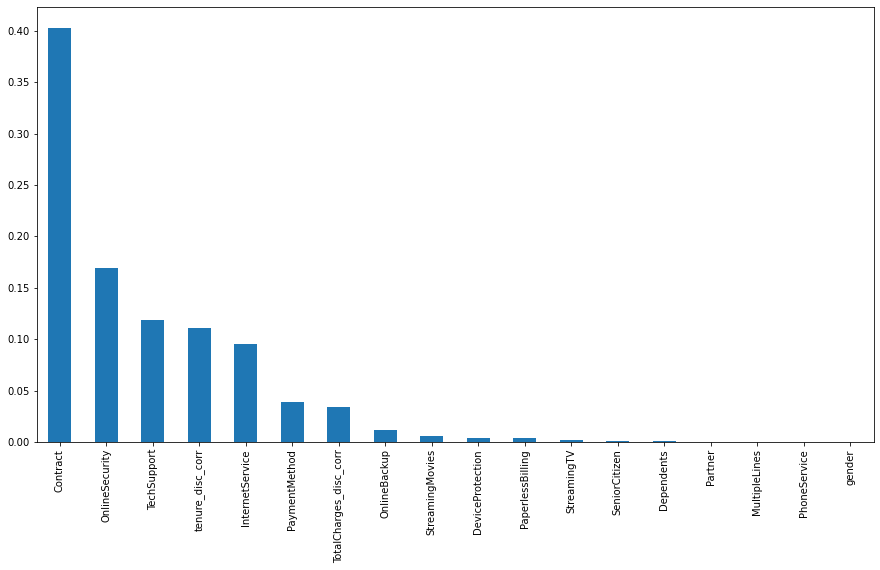

In [10]:
pd.Series(rf.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(15,8));

In [16]:
pd.DataFrame(rf_auc,index=['RForest']).to_csv('Rforest_auc.csv',index=False)